## Dependencies

## Introduction

<p><b>Algorithms we're considering</b></p>
<p>Naive Bayes</p>
<p>Support Vector Machines</p>
<p>K Nearest Neighbors</p>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = "spam_ham_dataset.csv"
data = pd.read_csv(path)
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\r...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\r\n( s...",0
2,3624,ham,"Subject: neon retreat\r\r\nho ho ho , we ' re ...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\r\nthis deal is...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\r\nthe transpo...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\r\n...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\r\n>\r...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
# There are no null values

## Data Cleaning

In [13]:
import nltk # natural language toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # split sentences to their root words
from sklearn.feature_extraction.text import TfidfVectorizer  # convert words to vectors
import string



nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()

words = []

stopwords_set  = set(stopwords.words('english'))

for i in range(len(data)):
    text = data['text'].iloc[i].casefold()
    text = text.translate(str.maketrans('','',string.punctuation)).split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    words.append(text)

## Vectorize Words

In [15]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(words).toarray()
y = data['label_num']

### Split Data into Training and Test Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4136, 47906)
(4136,)
(1035, 47906)
(1035,)


# Naive Bayes

#### Gussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
GNB_model = GaussianNB()
# Model training
GNB_model.fit(X_train, y_train)
GNB_model.score(X_train, y_train)

0.988394584139265

In [19]:
# on test data
GNB_model.score(X_test, y_test)

0.9468599033816425

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

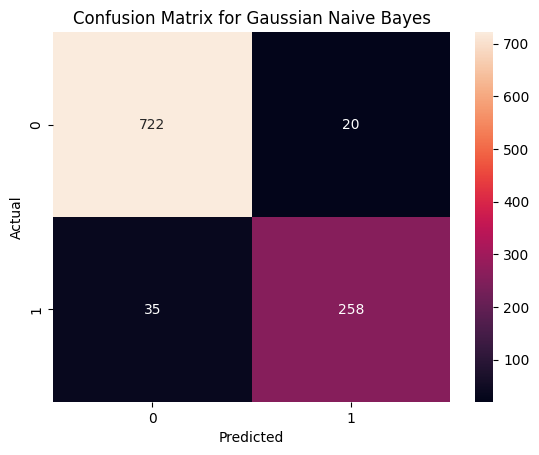

In [20]:
from sklearn.metrics import confusion_matrix
GNB_predict = GNB_model.predict(X_test)
cfm_gnb = confusion_matrix(y_test, GNB_predict)
sns.heatmap(cfm_gnb, annot=True, annot_kws={'size':10}, fmt="d")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [21]:
from sklearn.metrics import classification_report

In [22]:
print("Classification Report for Gaussian Naive Bayes")
print(classification_report(y_test, GNB_predict))

Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       742
           1       0.93      0.88      0.90       293

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.93      1035
weighted avg       0.95      0.95      0.95      1035



#### Multinomial Naive Bayes

In [23]:
MNB_model = MultinomialNB()
# Model training
MNB_model.fit(X_train, y_train)
MNB_model.score(X_train, y_train)

0.9608317214700194

In [24]:
# on test data
MNB_model.score(X_test, y_test)

0.9217391304347826

### Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

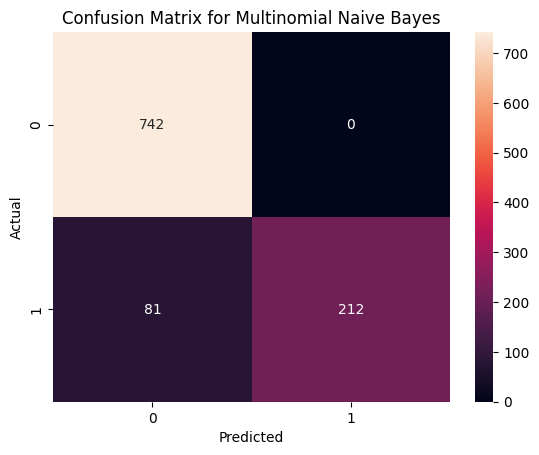

In [25]:
MNB_predict = MNB_model.predict(X_test)
cfm_mnb = confusion_matrix(y_test, MNB_predict)
sns.heatmap(cfm_mnb, annot=True, annot_kws={'size':10}, fmt="d")
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [26]:
print("Classification Report for Multinomial Naive Bayes")
print(classification_report(y_test, MNB_predict))

Classification Report for Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.72      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035



#### Bernoulli Naive Bayes

In [27]:
BNB_model = BernoulliNB()
# Model training
BNB_model.fit(X_train, y_train)
BNB_model.score(X_train, y_train)

0.8740328820116054

In [28]:
# on test data
BNB_model.score(X_test, y_test)

0.8473429951690822

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

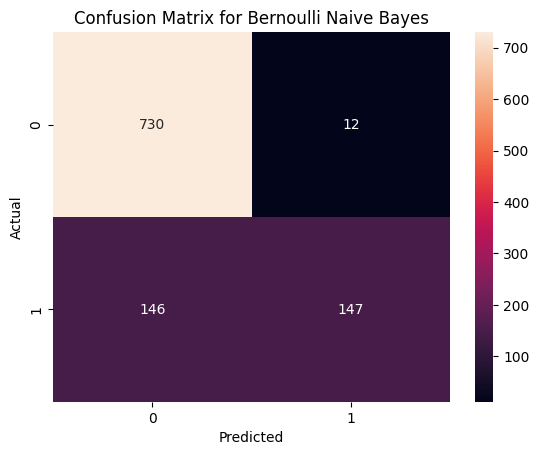

In [29]:
BNB_predict = BNB_model.predict(X_test)
cfm_bnb = confusion_matrix(y_test, BNB_predict)
sns.heatmap(cfm_bnb, annot=True, annot_kws={'size':10}, fmt="d")
plt.title("Confusion Matrix for Bernoulli Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
print("Classification Report for Bernoulli Naive Bayes")
print(classification_report(y_test, BNB_predict))

Classification Report for Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       742
           1       0.92      0.50      0.65       293

    accuracy                           0.85      1035
   macro avg       0.88      0.74      0.78      1035
weighted avg       0.86      0.85      0.83      1035



## Support Vector Machines

In [31]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC()

#Train the model using the training sets
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


1.0

In [ ]:
#performance on test data
clf.score(X_test, y_test)

0.9855072463768116

In [ ]:
svc_predict = clf.predict(X_test)
cfm_svc = confusion_matrix(y_test, svc_predict)
sns.heatmap(cfm_svc, annot=True, annot_kws={'size':10}, fmt="d")

In [ ]:
print("Classification Report for Support Vector Classifier")
print(classification_report(y_test, svc_predict))

## K- Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9765473887814313

In [37]:
#per4formance on test data
knn.score(X_test, y_test)

0.9603864734299516

Text(50.722222222222214, 0.5, 'Actual')

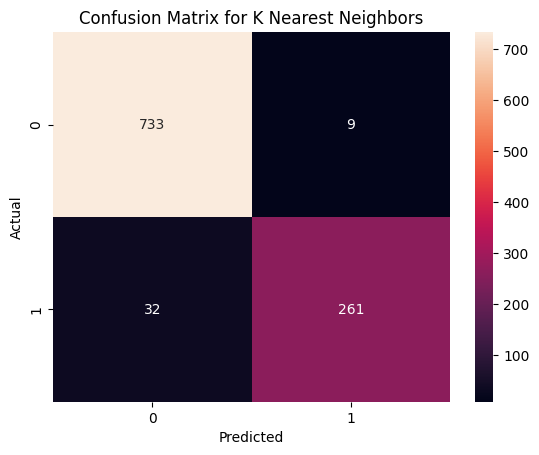

In [40]:
knn_predict = knn.predict(X_test)
cfm_knn = confusion_matrix(y_test, knn_predict)
sns.heatmap(cfm_knn, annot=True, annot_kws={'size':10}, fmt="d")
plt.title("Confusion Matrix for K Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
print("Classification Report for K Nearest Neighbors")
print(classification_report(y_test, knn_predict))

Classification Report for K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       742
           1       0.97      0.89      0.93       293

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [ ]:
# Results

# Results

| Model          |  | Accuracy on Test |
| :---------------- | :------: | ----: |
| Naive Bayes       |   Gussian Naive Bayes   | 0.9469 |
|       | Multinomial Naive Bayes | 0.9217|
|        |   Bernoulli Naive Bayes   | 0.8473|
| SVM          |    | 0.9855|
| K Nearest Neighbors   |   | 0.9604|
